In [156]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from csv import reader
import random
import operator

In [157]:
start_node_lst = ['514553' ,'4965' ,'143608','243284','152623' ,'533768','59217' ,'99373' ,'89325' ]

In [158]:
eps = 0.001
alpha = 0.2

In [159]:
f = open("com-amazon.all.dedup.cmty.txt","r")
communities = f.readlines()
communities = [communities[i].replace('\n','').split('\t') for i in range(len(communities))]

In [160]:
Graph = nx.read_edgelist('com-amazon.ungraph.txt',delimiter='\t')

In [161]:
# start_node = ['143608', '243284', '152623', '533768', '59217']
start_node =['514553' ,'4965' ,'143608','243284','152623']

In [162]:
correct_communities = {}
for i in start_node:
    for j in communities:
        if i in j:
            if i not in correct_communities:
                correct_communities[i] = [j]
            else:
                correct_communities[i].append(j)

In [163]:
def push(u,p,r):
    p_hat = p
    r_hat = r
    
    if u in p_hat:
        p_hat[u] = p[u] + alpha*r[u]
    else:
        p_hat[u]=  alpha*r[u]
    
    if u in r_hat:
        r_hat[u] = ((1-alpha)*r[u])/2
    else:
        r_hat[u]= 1
        
    neighbors_u = []
    for n in Graph.neighbors('%d'%(int(u))):
        neighbors_u.append(n)
    deg_u = len(neighbors_u)    
    
    for v in neighbors_u:
        if v in r:
            r_hat[v] = r[v] + ((1-alpha)*r[u])/(2*deg_u)
        else : 
            r_hat[v] = ((1-alpha)*r[u])/(2*deg_u)
    
    return p_hat, r_hat

In [165]:
def max_rBYd(Graph,r,eps,flag):
    Max = 0
    rBYd_lst=[]
    
    for u in r:
        div = r[u]/float(Graph.degree('%d'%(int(u))))    
        if div>Max:
            Max = div
        if div>=eps:
            rBYd_lst.append(u)
    
    if flag ==1:
        return Max
    elif flag==0:
        return random.choice(rBYd_lst)

In [166]:
def ApproximatePageRank(v,alpha,eps,Graph):
    p={}
    r={}
    r[v]=1
    while max_rBYd(Graph,r,eps,1) >=eps:
        u = max_rBYd(Graph,r,eps,0)
        p,r = push(u,p,r)
    
    return p

In [167]:
def conductance_vs_k_plot(sorted_q_vals,s,Graph):
    Conductance_lst=[]
    k_lst=[i for i in range(1,len(sorted_q_vals))]
    for k in k_lst:
        S_k = []
        for i in sorted_q_vals[:k]:
            S_k.append(str(i[0]))
        
        conductance_k = nx.algorithms.cuts.conductance(Graph,set(S_k))
        Conductance_lst.append(conductance_k)
        
    plt.plot(k_lst,Conductance_lst,'r')
    plt.scatter(k_lst,Conductance_lst,color='red')
    plt.title("Conductance vs k for start node %s"%(s))
    plt.xlabel("k")
    plt.ylabel("Conductance of Sk")
    plt.show()

In [168]:
def precision_vs_k_plot(sorted_q_vals,s,Graph,correct_communities):
    communities_s = correct_communities[str(s)]
    
    Communities_lst=[]
    
    k_lst=[i for i in range(1,len(sorted_q_vals))]
    c =0
    for community in communities_s:
        fraction_k =[]
        for k in k_lst:
            S_k = []
            for i in sorted_q_vals[:k]:
                S_k.append(i[0])
        
            S_k = set(S_k)
            intersection_Sk_community = S_k.intersection(set(community)) 
            fraction = len(intersection_Sk_community)/float(len(S_k))
            fraction_k.append(fraction)
            
        c+=1  
        plt.plot(k_lst,fraction_k)
        plt.scatter(k_lst,fraction_k)
        plt.title("Fraction of Sk in community %d for start node %s"%(c,s))
        plt.xlabel("k")
        plt.ylabel("Precision")
        plt.show()     

Start node  1
Number of nodes in support of start node- 514553 ->  11
Nodes in support of start node - 514553 -> ['514553', '526511', '261066', '4068', '77359', '193615', '11498', '73615', '118909', '236357', '211337']


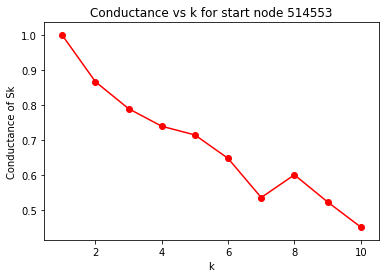

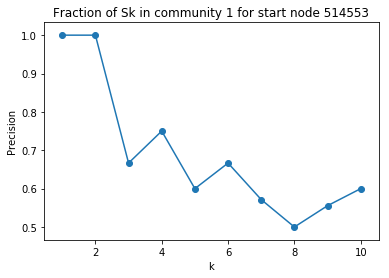

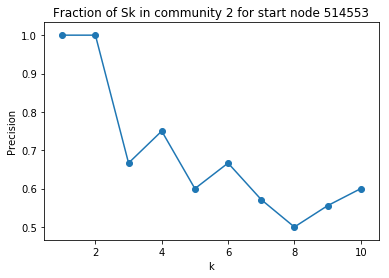

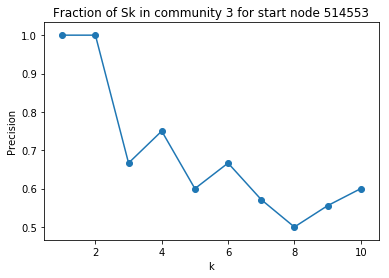

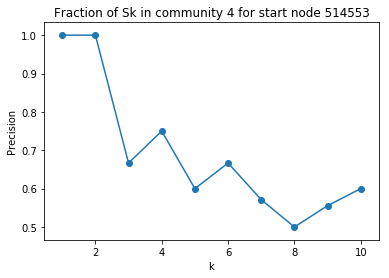

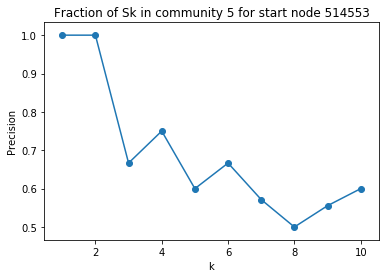

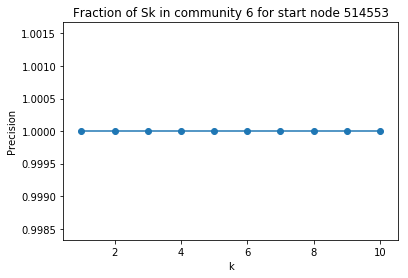

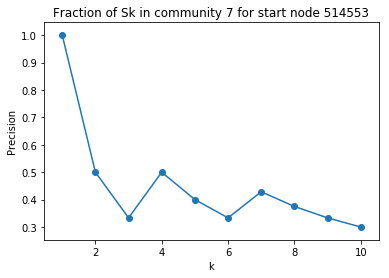

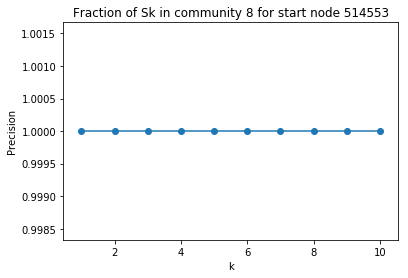

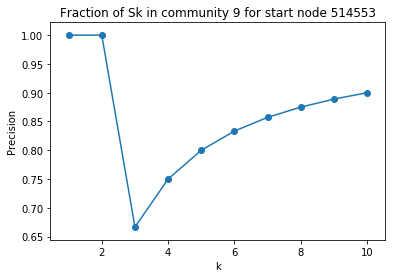

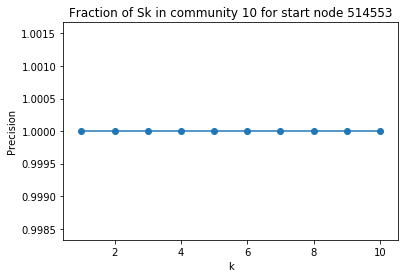

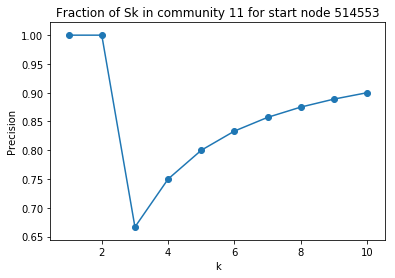

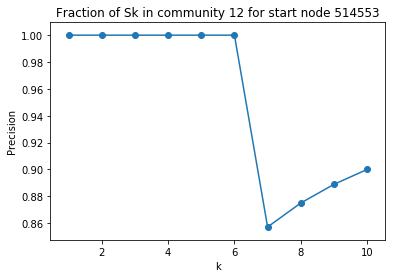

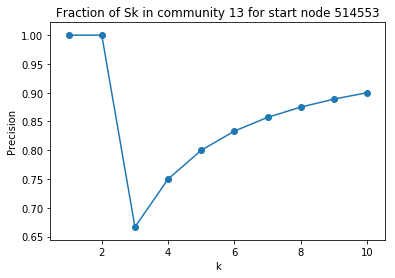

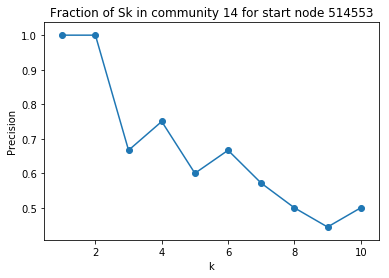

Start node  2
Number of nodes in support of start node- 4965 ->  13
Nodes in support of start node - 4965 -> ['4965', '436171', '436170', '235278', '340053', '47863', '540486', '333303', '8826', '475168', '397977', '436167', '350004']


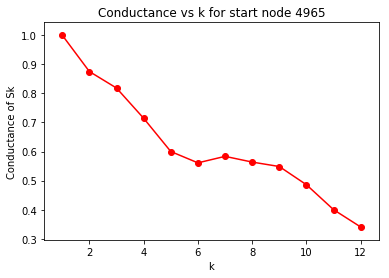

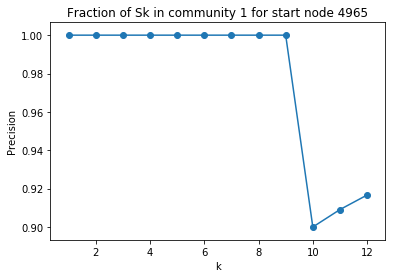

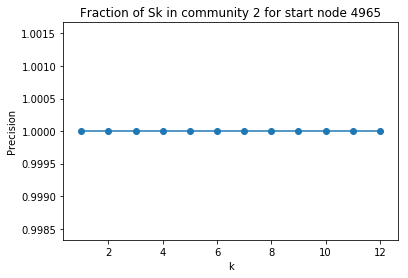

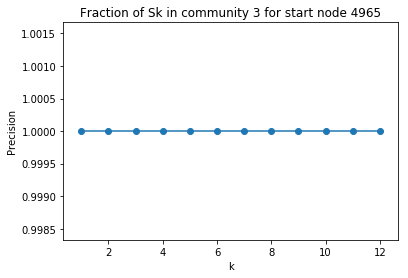

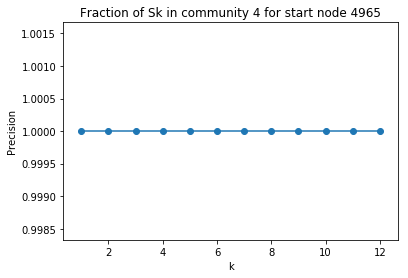

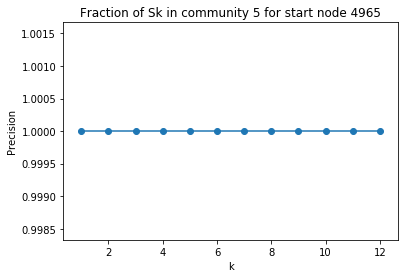

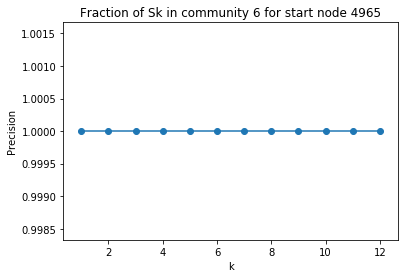

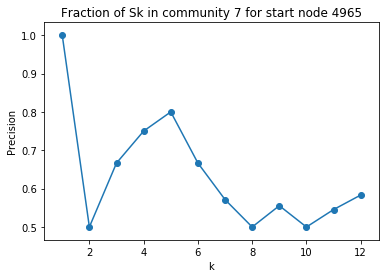

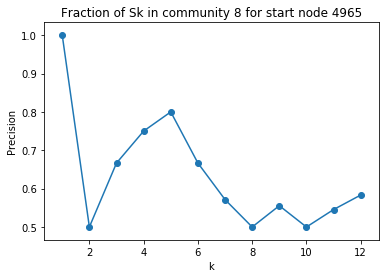

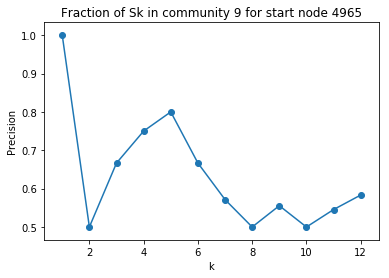

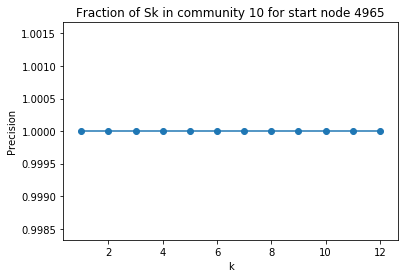

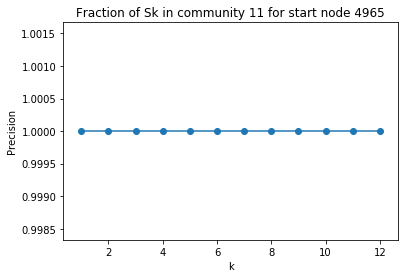

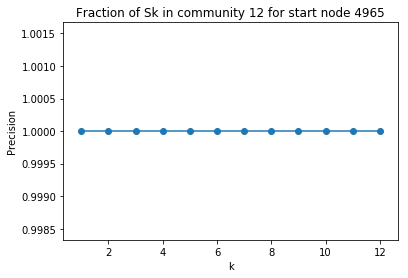

Start node  3
Number of nodes in support of start node- 143608 ->  21
Nodes in support of start node - 143608 -> ['143608', '255775', '498286', '48968', '419483', '118943', '5829', '507155', '187370', '410887', '13732', '366418', '327145', '255303', '98588', '168570', '377884', '541959', '410943', '193654', '539820']


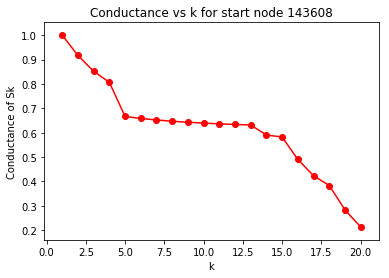

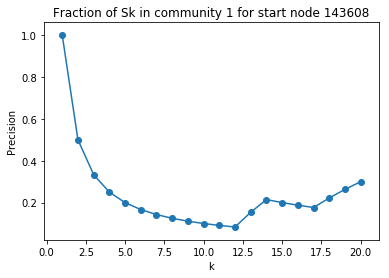

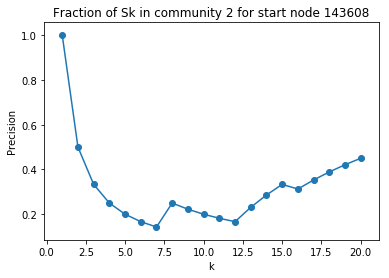

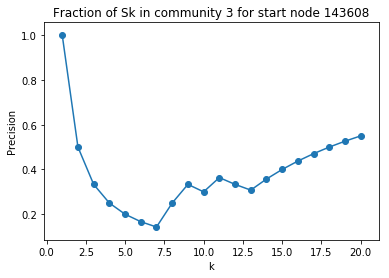

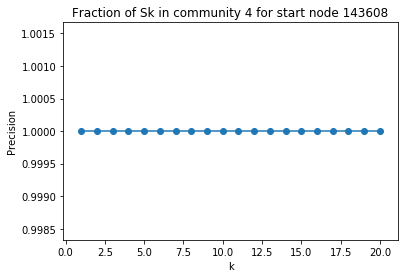

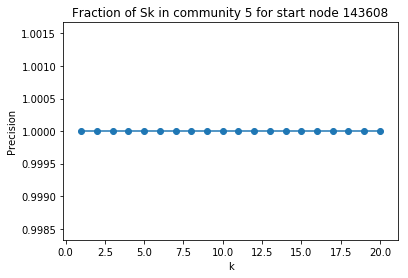

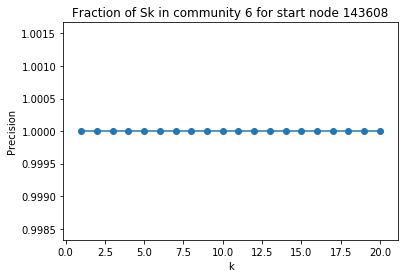

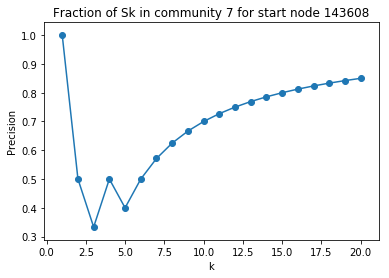

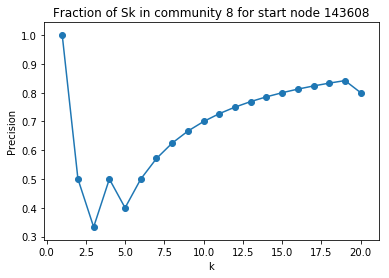

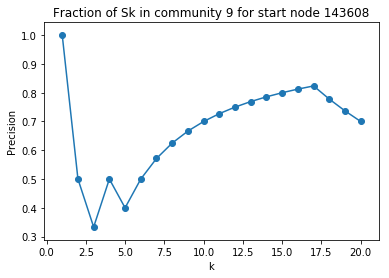

Start node  4
Number of nodes in support of start node- 243284 ->  11
Nodes in support of start node - 243284 -> ['243284', '93547', '150741', '375470', '108203', '344212', '42176', '36240', '419212', '501901', '181169']


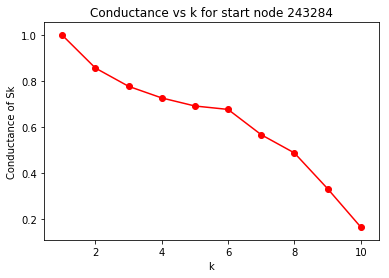

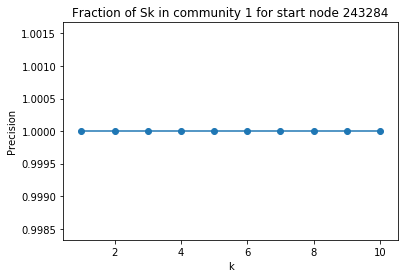

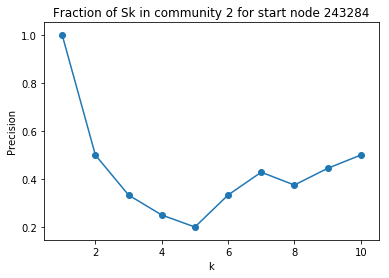

Start node  5
Number of nodes in support of start node- 152623 ->  21
Nodes in support of start node - 152623 -> ['152623', '261897', '524713', '371052', '501512', '508151', '351088', '436219', '480016', '526119', '51511', '503142', '156415', '510977', '520180', '336439', '251888', '531909', '172515', '537574', '246707']


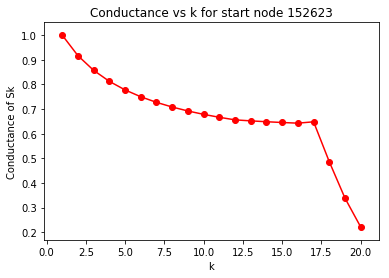

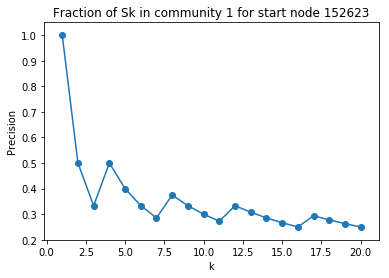

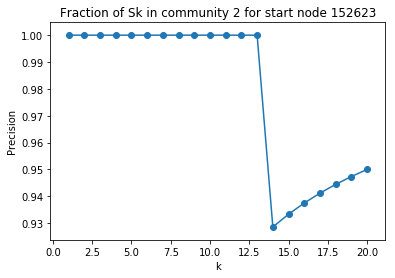

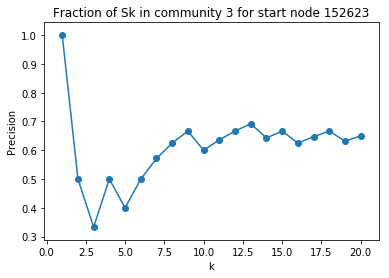

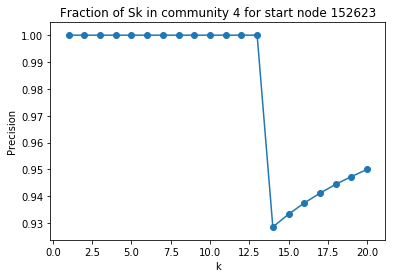

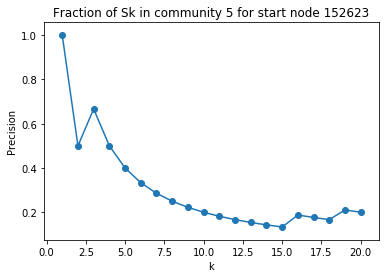

In [170]:
c=0
for s in start_node:
    q = ApproximatePageRank(s,alpha,eps,Graph)
    c+=1
    print("Start node ",c)
    print("Number of nodes in support of start node- %s -> "%(s), len(q.keys()))
    print("Nodes in support of start node - %s ->"%(s), list(q.keys()))
    
    for u in q:
        q[u] = q[u]/float(Graph.degree('%d'%(int(u))))
    
    sorted_q_vals = sorted(q.items(),key=operator.itemgetter(1),reverse=True)
    
    conductance_vs_k_plot(sorted_q_vals,s, Graph)
    precision_vs_k_plot(sorted_q_vals,s,Graph,correct_communities)